In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
iris = pd.read_csv("Iris.csv") 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.shape

(150, 6)

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
iris.drop('Id',axis=1,inplace=True)

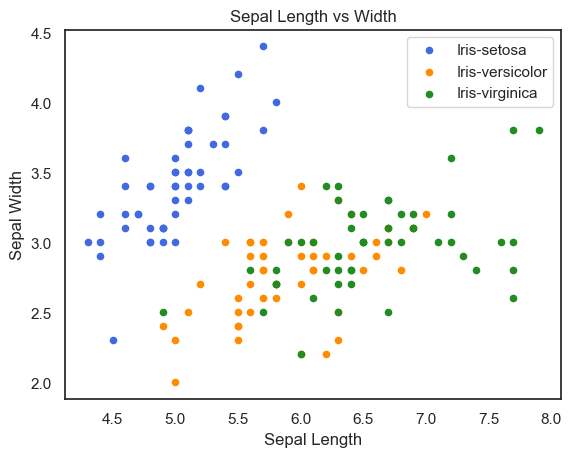

In [9]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='royalblue',label='Iris-setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='darkorange',label='Iris-versicolor',ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='forestgreen',label='Iris-virginica',ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Width');

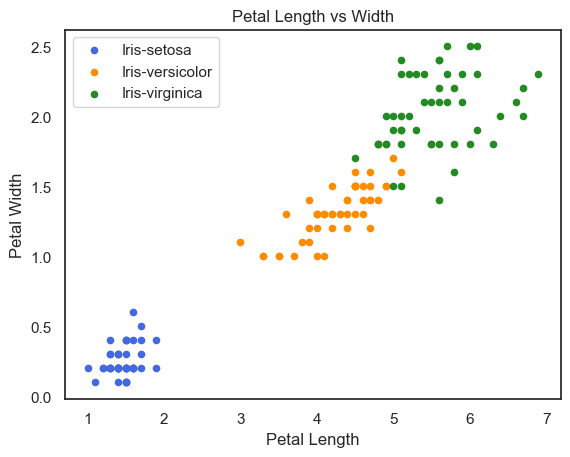

In [10]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='royalblue',label='Iris-setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='darkorange',label='Iris-versicolor',ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='forestgreen',label='Iris-virginica',ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Width');

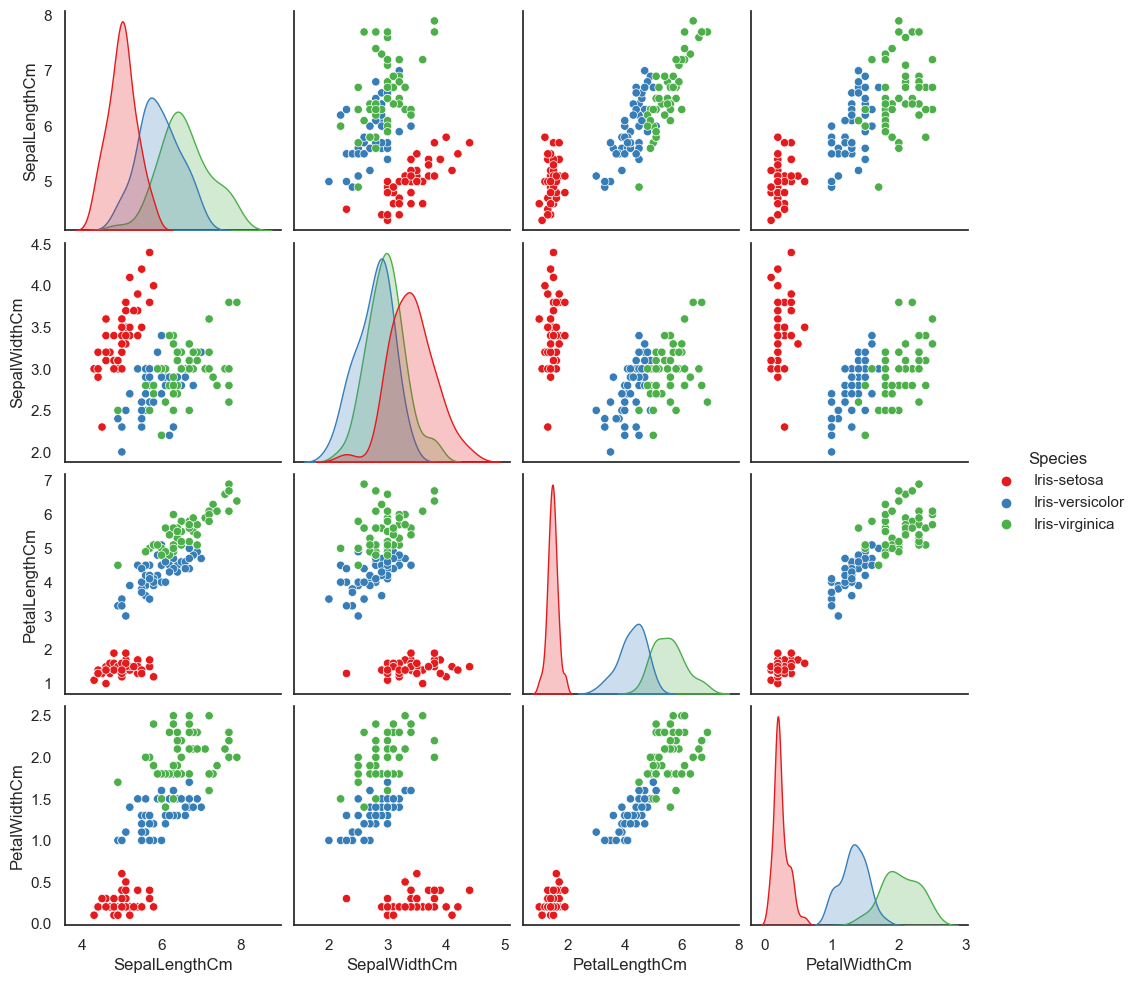

In [11]:
sns.pairplot(iris, hue='Species',palette='Set1');

In [12]:
#we will use Classification Algorithms to build our model.
X = iris.drop('Species', axis=1)
y = iris['Species']

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

0.9736842105263158


In [14]:
from sklearn import svm
classifier1 = svm.SVC()
classifier1.fit(X_train,y_train)
y_pred1 = classifier1.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
print(confusion_matrix(y_test, y_pred1))  
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test,y_pred1))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

0.9736842105263158


In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train,y_train)
y_pred2 = classifier2.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test,y_pred2))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

0.9736842105263158


In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors=5)
classifier3.fit(X_train,y_train)
y_pred3 = classifier3.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
print(confusion_matrix(y_test, y_pred3))  
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test,y_pred3))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

0.9736842105263158


In [17]:
#Creating Petals And Sepals Training Data
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [18]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [19]:
from sklearn import metrics 

In [20]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
# Evaluating the Algorithm
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
# Evaluating the Algorithm
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [21]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
# Evaluating the Algorithm
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
# Evaluating the Algorithm
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [22]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
# Evaluating the Algorithm
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
# Evaluating the Algorithm
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [23]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
# Evaluating the Algorithm
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
# Evaluating the Algorithm
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333
